<a href="https://colab.research.google.com/github/parthsantosh2411/twitter_sentimental_analysis-/blob/main/Parth_Tripathi_071_A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME-Parth Santosh Tripathi

BATCH-A3

PRN-2207012671

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


 **Pandas (`pd`)**: Provides data structures for data manipulation and analysis. DataFrames are used for handling and processing structured data.
   
  - **NumPy (`np`)**: A core library for numerical operations, facilitating array handling and mathematical computations.
   
  
  - **NLTK (Natural Language Toolkit)**:
   
   
      - **Stopwords**: Common words (e.g., "and", "the") that are filtered out during text preprocessing.
   
      - **Tokenization (`word_tokenize`)**: Splits text into individual words or tokens.
   
      - **Lemmatization (`WordNetLemmatizer`)**: Reduces words to their base or root form (e.g., "running" becomes "run").
   
  - **Regular Expressions (`re`)**: Used for text preprocessing tasks such as cleaning text and removing unwanted characters.
   
  - **Scikit-learn**:
   
      - **`train_test_split`**: Splits the dataset into training and testing subsets.
   
      - **`LabelEncoder`**: Encodes categorical target labels into numerical values.
   
      - **`CountVectorizer` and `TfidfVectorizer`**: Convert text into numerical feature vectors for machine learning models.


In [ ]:
file_path = "C:\\Users\\laksh\\Downloads\\archive\\training.1600000.processed.noemoticon.csv"
df = pd.read_csv(file_path, encoding='latin-1', header=None)
df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']


 - **`file_path`**: Specifies the location of the dataset file.
    
- **`pd.read_csv`**: Reads the CSV file into a DataFrame with `latin-1` encoding to handle special characters, and `header=None` to indicate the absence of header rows.

- **Column Naming**: Assigns descriptive names to the columns: `target` for sentiment labels, `id`, `date`, `flag`, `user` for metadata, and `text` for tweet content.

In [ ]:
df = df[['text', 'target']]


- **Column Filtering**: Keeps only the `text` and `target` columns necessary for the analysis, discarding irrelevant columns.

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\laksh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\laksh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\laksh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

- **`nltk.download('punkt')`**: Downloads tokenization models required for breaking text into sentences and words.

- **`nltk.download('stopwords')`**: Provides a list of common English stopwords to be used in preprocessing.

- **`nltk.download('wordnet')`**: Retrieves the WordNet corpus for lemmatization.

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


- **`stop_words`**: Initializes a set of English stopwords for filtering out common, non-informative words.

- **`lemmatizer`**: Creates an instance of `WordNetLemmatizer` to reduce words to their base forms.

In [ ]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'@\w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove symbols and numbers
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)


- **Lowercasing**: Converts all text to lowercase to ensure uniformity.
   
- **Remove URLs**: Eliminates URLs from the text to focus on meaningful content.
   
- **Remove Mentions and Hashtags**: Removes Twitter-specific mentions (`@username`) and hashtags (`#hashtag`).
   
- **Remove Symbols and Numbers**: Filters out non-alphabetic characters to concentrate on words.
   
- **Tokenization**: Splits text into individual tokens (words).
   
- **Lemmatization**: Reduces each token to its base form.
   
- **Stopword Removal**: Excludes common words that do not add significant meaning.

In [ ]:
df['text'] = df['text'].apply(preprocess)


- **Text Transformation**: Applies the `preprocess` function to the `text` column, cleaning and standardizing the text data for further analysis.

In [ ]:
label_encoder = LabelEncoder()
df['target'] = label_encoder.fit_transform(df['target'])


 - **`LabelEncoder`**: Converts categorical target labels into numerical values, making them suitable for machine learning algorithms.

In [ ]:
X = df['text']
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


- **Feature and Target Definition**: Defines `X` as the feature set (text data) and `y` as the target labels.
    
- **Data Splitting**: Uses **`train_test_split`** to divide the dataset into training and testing subsets, reserving 20% of the data for testing, with `random_state=42` ensuring reproducibility of the split.

In [ ]:
count_vectorizer = CountVectorizer(max_features=5000)
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)


 - **`CountVectorizer`**: This class from `sklearn.feature_extraction.text` converts a collection of text documents into a matrix of token counts. Each document is represented by a vector where each element represents the count of a specific term (word) in that document.
      
- **`max_features=5000`**: Limits the number of features (words) to 5000. This helps in managing the dimensionality of the feature space and computational efficiency.
    
    
 - **`fit_transform(X_train)`**: Fits the `CountVectorizer` model on the training data (`X_train`) and transforms it into a sparse matrix of token counts.
    
 - **`transform(X_test)`**: Transforms the test data (`X_test`) into a sparse matrix of token counts using the previously fitted `CountVectorizer`. It ensures that the same vocabulary is applied to both training and testing data.

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


 - **`TfidfVectorizer`**: This class from `sklearn.feature_extraction.text` converts a collection of text documents into a matrix of TF-IDF features. TF-IDF stands for Term Frequency-Inverse Document Frequency. It reflects the importance of a term in a document relative to a corpus.
      
- **`max_features=5000`**: Limits the number of features (words) to 5000, similar to `CountVectorizer`, to control the dimensionality and computational complexity.
    
- **`fit_transform(X_train)`**: Fits the `TfidfVectorizer` model on the training data (`X_train`) and transforms it into a sparse matrix of TF-IDF features.
    
- **`transform(X_test)`**: Transforms the test data (`X_test`) into a sparse matrix of TF-IDF features using the fitted `TfidfVectorizer`. This ensures consistency in feature representation between training and testing datasets.

In [ ]:
# Step 3: Corrected Batch Generator to Handle Sparse Data Efficiently
def batch_generator(X, y, batch_size):
    num_samples = X.shape[0]
    while True:  # Loop forever so the generator never terminates
        for offset in range(0, num_samples, batch_size):
            batch_X = X[offset:offset + batch_size].toarray()  # Convert to dense format
            batch_y = np.array(y[offset:offset + batch_size])  # Convert Series to NumPy array
            yield batch_X, batch_y




- **`batch_generator`**: Defines a generator function to yield batches of data for training a machine learning model. This is especially useful when dealing with large datasets that do not fit into memory all at once.
    - **Parameters**:
        - **`X`**: The feature matrix, which is expected to be in a sparse format (e.g., from `CountVectorizer` or `TfidfVectorizer`).
        - **`y`**: The target vector, containing the labels corresponding to the features in `X`.
        - **`batch_size`**: The number of samples to be included in each batch.




- **`num_samples`**: Determines the total number of samples in the dataset. `X.shape[0]` gives the number of rows (samples) in the feature matrix `X`.



- **`while True`**: Creates an infinite loop to continuously generate batches of data. This is useful for training models iteratively until the end of the dataset is reached, allowing for continuous training.



- **`for offset in range(0, num_samples, batch_size)`**: Iterates through the dataset in increments of `batch_size`. `offset` is the starting index for each batch, progressing by `batch_size` with each iteration.



- **`batch_X`**: Extracts a slice of `X` corresponding to the current batch. **`X[offset:offset + batch_size]`** selects the subset of rows for the batch. **`.toarray()`** converts the sparse matrix to a dense format (NumPy array). This is often necessary for models that do not support sparse matrices directly.
    
- **`batch_y`**: Extracts the corresponding target labels for the current batch. **`np.array(y[offset:offset + batch_size])`** converts the subset of the `y` Series to a NumPy array for compatibility with model training.



- **`yield`**: Outputs the batch of data (`batch_X` and `batch_y`) to the caller. The generator will pause here and resume from this point on the next iteration, providing a new batch of data each time it is called.



In [ ]:
# Step 4: Define Models for Logistic Regression, SVC, and Random Forest Mimic
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, InputLayer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

- **Imports**:
  
  - `Sequential` from `tensorflow.keras.models`: Used to create a linear stack of layers.
  
  - `Dense`, `Dropout`, `InputLayer` from `tensorflow.keras.layers`: Building blocks for the neural network layers.
  
  - `EarlyStopping`, `ModelCheckpoint` from `tensorflow.keras.callbacks`: Useful for training the models (though not used directly in the provided functions, these callbacks can be added during model training to monitor performance and save the best model).


In [ ]:
def build_logistic_regression_mimic_model(input_shape):
    model = Sequential([
        InputLayer(input_shape=(input_shape,)),  # Input layer
        Dense(3, activation='softmax')  # Output layer for classification
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


 **`build_logistic_regression_mimic_model`**: Defines a neural network model to mimic the behavior of a logistic regression classifier.
    
- **`InputLayer(input_shape=(input_shape,))`**: Specifies the shape of the input data. The input layer has `input_shape` dimensions, matching the number of features in the data.
    
- **`Dense(3, activation='softmax')`**: Adds a dense output layer with 3 units and a softmax activation function. The softmax function converts the raw output into probabilities for each of the 3 classes.
   
 - **`model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])`**: Compiles the model using the Adam optimizer, sparse categorical crossentropy loss (suitable for classification problems), and accuracy as the evaluation metric.


In [ ]:
def build_svc_mimic_model(input_shape):
    model = Sequential([
        InputLayer(input_shape=(input_shape,)),  # Input layer
        Dense(256, activation='relu'),  # First hidden layer
        Dropout(0.5),  # Regularization
        Dense(128, activation='relu'),  # Second hidden layer
        Dropout(0.5),  # Regularization
        Dense(3, activation='softmax')  # Output layer
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


   - **`build_svc_mimic_model`**: Defines a neural network model to mimic the behavior of a Support Vector Classification (SVC) model.
    
   - **`Dense(256, activation='relu')`**: Adds a hidden layer with 256 units and ReLU activation function. ReLU (Rectified Linear Unit) introduces non-linearity to the model.
    
   - **`Dropout(0.5)`**: Adds dropout regularization to prevent overfitting. During training, 50% of the neurons are randomly ignored.
    
   - **`Dense(128, activation='relu')`**: Adds a second hidden layer with 128 units and ReLU activation.
    
   - **`Dense(3, activation='softmax')`**: Adds a dense output layer with 3 units and softmax activation, providing class probabilities.
    
   - **`model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])`**: Compiles the model with the Adam optimizer, sparse categorical crossentropy loss, and accuracy metric.


In [ ]:
def build_random_forest_mimic_model(input_shape):
    model = Sequential([
        InputLayer(input_shape=(input_shape,)),  # Input layer
        Dense(512, activation='relu'),  # First hidden layer
        Dropout(0.5),  # Regularization
        Dense(256, activation='relu'),  # Second hidden layer
        Dropout(0.5),  # Regularization
        Dense(128, activation='relu'),  # Third hidden layer
        Dropout(0.5),  # Regularization
        Dense(3, activation='softmax')  # Output layer
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


- **`build_random_forest_mimic_model`**: Defines a neural network model to mimic the behavior of a Random Forest classifier.
  
- **`Dense(512, activation='relu')`**: Adds a hidden layer with 512 units and ReLU activation.
    
- **`Dropout(0.5)`**: Applies dropout regularization with 50% dropout rate.
    
- **`Dense(256, activation='relu')`**: Adds a second hidden layer with 256 units and ReLU activation.
    
- **`Dense(128, activation='relu')`**: Adds a third hidden layer with 128 units and ReLU activation.
    
- **`Dense(3, activation='softmax')`**: Adds a dense output layer with 3 units and softmax activation.
    
- **`model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])`**: Compiles the model with the Adam optimizer, sparse categorical crossentropy loss, and accuracy metric.

## Summary

### **Logistic Regression Mimic**

**Overview**:
- **Logistic Regression**: A foundational algorithm for binary and multi-class classification tasks. It creates a linear decision boundary to separate classes and estimates class probabilities.

**Neural Network Mimic**:
- **Architecture**:
  - **Single Dense Layer**: In the neural network, a single dense (fully connected) layer with `softmax` activation function closely approximates the decision boundary of logistic regression. This layer outputs probabilities for each class, similar to logistic regression’s probability estimates.
  - **Activation Function**: The `softmax` function in the output layer generates a probability distribution over the classes, replicating the logistic regression’s probabilistic classification.
  
**Conclusion**: This architecture directly mirrors the core functionality of logistic regression, using a neural network's dense layer to achieve the same linear decision-making process.

### **SVC Mimic**

**Overview**:
- **Support Vector Classification (SVC)**: Known for finding an optimal hyperplane that maximizes the margin between classes. SVC can handle non-linear decision boundaries using kernel functions.

**Neural Network Mimic**:
- **Architecture**:
  - **Multiple Hidden Layers**: The neural network includes several dense layers with `relu` activation functions. These layers introduce non-linearity into the model, akin to how SVC uses kernel functions to handle non-linear data.
  - **Dropout Regularization**: Dropout layers are employed to prevent overfitting, similar to SVC’s ability to generalize well even in high-dimensional spaces. This regularization mimics SVC's robustness in dealing with complex data.
  - **Output Layer**: The final `softmax` layer provides class probabilities, consistent with SVC’s approach to classification.

**Conclusion**: By incorporating multiple hidden layers and dropout, this neural network model emulates SVC's capability to handle complex, non-linear decision boundaries while maintaining a high level of robustness and generalization.

### **Random Forest Mimic**

**Overview**:
- **Random Forest**: An ensemble learning method that aggregates predictions from multiple decision trees to enhance accuracy and robustness. It is effective in handling high-dimensional data and preventing overfitting.

**Neural Network Mimic**:
- **Architecture**:
  - **Deep Network with Multiple Layers**: The neural network features several dense layers with `relu` activations, reflecting the depth and complexity of Random Forest’s ensemble of decision trees. Each hidden layer can be seen as simulating a decision tree's capacity to learn complex patterns.
  - **Dropout Regularization**: Regularization through dropout layers ensures the model does not overfit, akin to how Random Forest reduces overfitting by averaging multiple trees.
  - **Output Layer**: The `softmax` activation in the output layer generates class probabilities, replicating the final class predictions of a Random Forest.

**Conclusion**: This deep network structure with multiple layers and dropout closely mimics the ensemble learning and robustness characteristics of Random Forest, leveraging the power of deep learning to approximate the decision-making process of multiple decision trees.




In [ ]:
# Step 5: Train Logistic Regression Mimic Model with CountVectorizer using Batch Generator
logistic_regression_mimic_count = build_logistic_regression_mimic_model(X_train_count.shape[1])
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
checkpoint = ModelCheckpoint('logistic_regression_mimic_count_best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

# Train Logistic Regression Mimic Model with CountVectorizer (Batch Generator)
batch_size = 128
train_generator = batch_generator(X_train_count, y_train, batch_size)
validation_generator = batch_generator(X_test_count, y_test, batch_size)

logistic_regression_mimic_count.fit(
    train_generator,
    steps_per_epoch=X_train_count.shape[0] // batch_size,
    validation_data=validation_generator,
    validation_steps=X_test_count.shape[0] // batch_size,
    epochs=10,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

# Train SVC Mimic Model with TFIDFVectorizer using Batch Generator
svc_mimic_tfidf = build_svc_mimic_model(X_train_tfidf.shape[1])
checkpoint = ModelCheckpoint('svc_mimic_tfidf_best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

train_generator_tfidf = batch_generator(X_train_tfidf, y_train, batch_size)
validation_generator_tfidf = batch_generator(X_test_tfidf, y_test, batch_size)

svc_mimic_tfidf.fit(
    train_generator_tfidf,
    steps_per_epoch=X_train_tfidf.shape[0] // batch_size,
    validation_data=validation_generator_tfidf,
    validation_steps=X_test_tfidf.shape[0] // batch_size,
    epochs=10,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

# Train Random Forest Mimic Model with CountVectorizer using Batch Generator
random_forest_mimic_count = build_random_forest_mimic_model(X_train_count.shape[1])
checkpoint = ModelCheckpoint('random_forest_mimic_count_best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

random_forest_mimic_count.fit(
    train_generator,
    steps_per_epoch=X_train_count.shape[0] // batch_size,
    validation_data=validation_generator,
    validation_steps=X_test_count.shape[0] // batch_size,
    epochs=10,
    callbacks=[early_stop, checkpoint],
    verbose=1
)


Epoch 1/10
 9994/10000 [============================>.] - ETA: 0s - loss: 0.5256 - accuracy: 0.7652
Epoch 1: val_loss improved from inf to 0.49075, saving model to logistic_regression_mimic_count_best_model.h5
10000/10000 [==============================] - 49s 5ms/step - loss: 0.5256 - accuracy: 0.7652 - val_loss: 0.4908 - val_accuracy: 0.7726
Epoch 2/10
 9996/10000 [============================>.] - ETA: 0s - loss: 0.4890 - accuracy: 0.7736
Epoch 2: val_loss improved from 0.49075 to 0.48967, saving model to logistic_regression_mimic_count_best_model.h5
10000/10000 [==============================] - 47s 5ms/step - loss: 0.4890 - accuracy: 0.7736 - val_loss: 0.4897 - val_accuracy: 0.7732
Epoch 3/10
 9995/10000 [============================>.] - ETA: 0s - loss: 0.4884 - accuracy: 0.7740
Epoch 3: val_loss did not improve from 0.48967
10000/10000 [==============================] - 47s 5ms/step - loss: 0.4884 - accuracy: 0.7740 - val_loss: 0.4898 - val_accuracy: 0.7734
Epoch 4/10
 9997/1000



### 1. Logistic Regression Mimic Model with CountVectorizer

**Model Definition:**
We start by defining and building a Logistic Regression mimic model using the `build_logistic_regression_mimic_model` function. This function constructs a neural network architecture that approximates the behavior of a traditional Logistic Regression classifier.

**Callbacks:**
- `EarlyStopping`: Stops training when the validation loss does not improve for a specified number of epochs (patience=3). This helps prevent overfitting.
- `ModelCheckpoint`: Saves the model with the best validation loss to a file named `'logistic_regression_mimic_count_best_model.h5'`. This allows us to load the best-performing model later.

**Training:**
- **Batch Size:** 128 samples per batch.
- **Train Generator:** Created using `batch_generator` function for `X_train_count` and `y_train`.
- **Validation Generator:** Created using `batch_generator` function for `X_test_count` and `y_test`.

The model is trained using the `.fit()` method with the following parameters:
- `train_generator`: Provides the training data in batches.
- `steps_per_epoch`: Number of steps per epoch, calculated as the total number of training samples divided by the batch size.
- `validation_data`: Provides the validation data in batches.
- `validation_steps`: Number of validation steps per epoch, calculated similarly to steps per epoch.
- `epochs`: Number of epochs to train the model.
- `callbacks`: List of callbacks to apply during training.
- `verbose`: Sets the verbosity mode for logging.

### 2. SVC Mimic Model with TFIDFVectorizer

**Model Definition:**
We define and build an SVC mimic model using the `build_svc_mimic_model` function. This function constructs a neural network that mimics the behavior of a traditional Support Vector Classifier.

**Callbacks:**
- `ModelCheckpoint`: Saves the best model based on validation loss to `'svc_mimic_tfidf_best_model.h5'`.

**Training:**
- **Batch Size:** 128 samples per batch.
- **Train Generator:** Created using `batch_generator` function for `X_train_tfidf` and `y_train`.
- **Validation Generator:** Created using `batch_generator` function for `X_test_tfidf` and `y_test`.

The model is trained using similar parameters as described above for the Logistic Regression model.

### 3. Random Forest Mimic Model with CountVectorizer

**Model Definition:**
We define and build a Random Forest mimic model using the `build_random_forest_mimic_model` function. This function constructs a neural network that approximates the behavior of a traditional Random Forest classifier.

**Callbacks:**
- `ModelCheckpoint`: Saves the best model based on validation loss to `'random_forest_mimic_count_best_model.h5'`.

**Training:**
- **Batch Size:** 128 samples per batch.
- **Train Generator:** Created using `batch_generator` function for `X_train_count` and `y_train`.
- **Validation Generator:** Created using `batch_generator` function for `X_test_count` and `y_test`.

The model is trained using the same parameters as mentioned for the previous models.


In [ ]:
# Train Logistic Regression Mimic Model with TFIDFVectorizer using Batch Generator
logistic_regression_mimic_tfidf = build_logistic_regression_mimic_model(X_train_tfidf.shape[1])
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
checkpoint = ModelCheckpoint('logistic_regression_mimic_tfidf_best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

# Train Logistic Regression Mimic Model with TFIDFVectorizer (Batch Generator)
train_generator_tfidf = batch_generator(X_train_tfidf, y_train, batch_size)
validation_generator_tfidf = batch_generator(X_test_tfidf, y_test, batch_size)

logistic_regression_mimic_tfidf.fit(
    train_generator_tfidf,
    steps_per_epoch=X_train_tfidf.shape[0] // batch_size,
    validation_data=validation_generator_tfidf,
    validation_steps=X_test_tfidf.shape[0] // batch_size,
    epochs=10,
    callbacks=[early_stop, checkpoint],
    verbose=1
)


Epoch 1/10
 9988/10000 [============================>.] - ETA: 0s - loss: 0.5406 - accuracy: 0.7631
Epoch 1: val_loss improved from inf to 0.48185, saving model to logistic_regression_mimic_tfidf_best_model.h5
10000/10000 [==============================] - 43s 4ms/step - loss: 0.5405 - accuracy: 0.7631 - val_loss: 0.4818 - val_accuracy: 0.7723
Epoch 2/10
 9993/10000 [============================>.] - ETA: 0s - loss: 0.4770 - accuracy: 0.7742
Epoch 2: val_loss improved from 0.48185 to 0.47663, saving model to logistic_regression_mimic_tfidf_best_model.h5
10000/10000 [==============================] - 47s 5ms/step - loss: 0.4769 - accuracy: 0.7742 - val_loss: 0.4766 - val_accuracy: 0.7734
Epoch 3/10
 9993/10000 [============================>.] - ETA: 0s - loss: 0.4743 - accuracy: 0.7752
Epoch 3: val_loss improved from 0.47663 to 0.47609, saving model to logistic_regression_mimic_tfidf_best_model.h5
10000/10000 [==============================] - 42s 4ms/step - loss: 0.4743 - accuracy: 0.7

## Training Logistic Regression Mimic Model with TFIDFVectorizer

### Model Definition

**Logistic Regression Mimic Model:**
- **Model Building:** We build the mimic model using the `build_logistic_regression_mimic_model` function. This function constructs a neural network architecture designed to approximate the functionality of a traditional Logistic Regression classifier. The number of input features is specified by `X_train_tfidf.shape[1]`, which corresponds to the number of features generated by the `TFIDFVectorizer`.

### Callbacks

**EarlyStopping:**
- **Purpose:** This callback monitors the validation loss during training and stops the training process if the validation loss does not improve for a specified number of epochs (patience=3). This helps to prevent overfitting and ensures efficient training.
- **Parameters:** `monitor='val_loss'` tracks validation loss, `patience=3` allows training to continue for three more epochs if no improvement is observed, and `verbose=1` provides logging information.

**ModelCheckpoint:**
- **Purpose:** This callback saves the model with the best validation loss to a file. This allows us to retrieve the model that performed best on the validation set.
- **Parameters:** `monitor='val_loss'` tracks validation loss, `save_best_only=True` ensures that only the best model (based on validation loss) is saved, and `verbose=1` provides logging information.

### Data Generators

**Train and Validation Generators:**
- **Train Generator:** Created using the `batch_generator` function for `X_train_tfidf` and `y_train`. This generator yields batches of data for training.
- **Validation Generator:** Created using the `batch_generator` function for `X_test_tfidf` and `y_test`. This generator yields batches of data for validation.

### Training Procedure

**Model Fitting:**
- **Method:** `.fit()`
- **Parameters:**
  - `train_generator`: Provides the training data in batches.
  - `steps_per_epoch`: The number of steps (batches) per epoch is calculated as the total number of training samples divided by the batch size (`X_train_tfidf.shape[0] // batch_size`).
  - `validation_data`: The validation data generator provides batches of validation data.
  - `validation_steps`: The number of validation steps per epoch is calculated similarly to steps per epoch.
  - `epochs`: The number of epochs to train the model (set to 10).
  - `callbacks`: List of callbacks used during training (`early_stop` and `checkpoint`).
  - `verbose`: The verbosity mode is set to 1, which provides detailed logging during training.

### Summary

In this section, we have trained a neural network model designed to mimic a traditional Logistic Regression classifier using `TFIDFVectorizer` for feature extraction. The model is trained with batch generators for efficient processing of large datasets, and callbacks are employed to monitor and optimize the training process. The use of early stopping helps prevent overfitting, while model checkpointing ensures that the best model is saved based on validation performance.


In [ ]:
# Train SVC Mimic Model with CountVectorizer using Batch Generator
svc_mimic_count = build_svc_mimic_model(X_train_count.shape[1])
checkpoint = ModelCheckpoint('svc_mimic_count_best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

# Train SVC Mimic Model with CountVectorizer (Batch Generator)
train_generator_count = batch_generator(X_train_count, y_train, batch_size)
validation_generator_count = batch_generator(X_test_count, y_test, batch_size)

svc_mimic_count.fit(
    train_generator_count,
    steps_per_epoch=X_train_count.shape[0] // batch_size,
    validation_data=validation_generator_count,
    validation_steps=X_test_count.shape[0] // batch_size,
    epochs=10,
    callbacks=[early_stop, checkpoint],
    verbose=1
)


Epoch 1/10
 9998/10000 [============================>.] - ETA: 0s - loss: 0.4861 - accuracy: 0.7689
Epoch 1: val_loss improved from inf to 0.46181, saving model to svc_mimic_count_best_model.h5
10000/10000 [==============================] - 52s 5ms/step - loss: 0.4861 - accuracy: 0.7689 - val_loss: 0.4618 - val_accuracy: 0.7810
Epoch 2/10
10000/10000 [==============================] - ETA: 0s - loss: 0.4596 - accuracy: 0.7842
Epoch 2: val_loss improved from 0.46181 to 0.45593, saving model to svc_mimic_count_best_model.h5
10000/10000 [==============================] - 51s 5ms/step - loss: 0.4596 - accuracy: 0.7842 - val_loss: 0.4559 - val_accuracy: 0.7850
Epoch 3/10
 9999/10000 [============================>.] - ETA: 0s - loss: 0.4454 - accuracy: 0.7925
Epoch 3: val_loss did not improve from 0.45593
10000/10000 [==============================] - 51s 5ms/step - loss: 0.4454 - accuracy: 0.7925 - val_loss: 0.4562 - val_accuracy: 0.7857
Epoch 4/10
 9995/10000 [============================>

## Training SVC Mimic Model with CountVectorizer


### Model Definition

**SVC Mimic Model:**
- **Model Building:** We use the `build_svc_mimic_model` function to construct the mimic model. This neural network architecture is designed to replicate the functionality of a traditional SVC classifier. The number of input features is specified by `X_train_count.shape[1]`, which corresponds to the number of features generated by the `CountVectorizer`.

### Callbacks

**ModelCheckpoint:**
- **Purpose:** This callback saves the model with the best validation loss during training. This ensures that the model with the optimal performance on the validation set is preserved.
- **Parameters:** `monitor='val_loss'` tracks validation loss, `save_best_only=True` ensures that only the model with the best validation loss is saved, and `verbose=1` provides detailed logging information.

### Data Generators

**Train and Validation Generators:**
- **Train Generator:** Created using the `batch_generator` function for `X_train_count` and `y_train`. This generator produces batches of training data.
- **Validation Generator:** Created using the `batch_generator` function for `X_test_count` and `y_test`. This generator produces batches of validation data.

### Training Procedure

**Model Fitting:**
- **Method:** `.fit()`
- **Parameters:**
  - `train_generator_count`: Provides the training data in batches.
  - `steps_per_epoch`: The number of steps (batches) per epoch is calculated as the total number of training samples divided by the batch size (`X_train_count.shape[0] // batch_size`).
  - `validation_data`: The validation data generator provides batches of validation data.
  - `validation_steps`: The number of validation steps per epoch is calculated similarly to steps per epoch.
  - `epochs`: The number of epochs to train the model (set to 10).
  - `callbacks`: List of callbacks used during training (`checkpoint`).
  - `verbose`: The verbosity mode is set to 1, which provides detailed logging during training.

### Summary

In this section, we have trained a neural network model designed to mimic a traditional SVC classifier using features extracted by `CountVectorizer`. The training process is handled using batch generators for efficient data processing, and the model checkpoint callback ensures that the best-performing model based on validation loss is saved. This approach allows us to approximate the behavior of an SVC classifier using deep learning techniques.


In [ ]:
# Train Random Forest Mimic Model with TFIDFVectorizer using Batch Generator
random_forest_mimic_tfidf = build_random_forest_mimic_model(X_train_tfidf.shape[1])
checkpoint = ModelCheckpoint('random_forest_mimic_tfidf_best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

# Train Random Forest Mimic Model with TFIDFVectorizer (Batch Generator)
train_generator_tfidf = batch_generator(X_train_tfidf, y_train, batch_size)
validation_generator_tfidf = batch_generator(X_test_tfidf, y_test, batch_size)

random_forest_mimic_tfidf.fit(
    train_generator_tfidf,
    steps_per_epoch=X_train_tfidf.shape[0] // batch_size,
    validation_data=validation_generator_tfidf,
    validation_steps=X_test_tfidf.shape[0] // batch_size,
    epochs=10,
    callbacks=[early_stop, checkpoint],
    verbose=1
)


Epoch 1/10
 9996/10000 [============================>.] - ETA: 0s - loss: 0.4842 - accuracy: 0.7687
Epoch 1: val_loss improved from inf to 0.46097, saving model to random_forest_mimic_tfidf_best_model.h5
10000/10000 [==============================] - 44s 4ms/step - loss: 0.4842 - accuracy: 0.7687 - val_loss: 0.4610 - val_accuracy: 0.7807
Epoch 2/10
 9992/10000 [============================>.] - ETA: 0s - loss: 0.4569 - accuracy: 0.7868
Epoch 2: val_loss improved from 0.46097 to 0.45578, saving model to random_forest_mimic_tfidf_best_model.h5
10000/10000 [==============================] - 43s 4ms/step - loss: 0.4569 - accuracy: 0.7868 - val_loss: 0.4558 - val_accuracy: 0.7851
Epoch 3/10
 9992/10000 [============================>.] - ETA: 0s - loss: 0.4382 - accuracy: 0.7991
Epoch 3: val_loss improved from 0.45578 to 0.45522, saving model to random_forest_mimic_tfidf_best_model.h5
10000/10000 [==============================] - 43s 4ms/step - loss: 0.4382 - accuracy: 0.7991 - val_loss: 0.

## Training Random Forest Mimic Model with TFIDFVectorizer



### Model Definition

**Random Forest Mimic Model:**
- **Model Building:** The `build_random_forest_mimic_model` function constructs a neural network architecture designed to approximate the behavior of a traditional Random Forest classifier. The input features for the model are specified by `X_train_tfidf.shape[1]`, which indicates the number of features derived from `TFIDFVectorizer`.

### Callbacks

**ModelCheckpoint:**
- **Purpose:** This callback saves the model that performs best on the validation set, based on validation loss. This ensures that the model with the optimal performance is retained.
- **Parameters:** `monitor='val_loss'` tracks validation loss, `save_best_only=True` ensures that only the model with the best validation loss is saved, and `verbose=1` provides detailed logging during training.

### Data Generators

**Train and Validation Generators:**
- **Train Generator:** Created using the `batch_generator` function for `X_train_tfidf` and `y_train`. This generator yields batches of training data for the model.
- **Validation Generator:** Created using the `batch_generator` function for `X_test_tfidf` and `y_test`. This generator yields batches of validation data.

### Training Procedure

**Model Fitting:**
- **Method:** `.fit()`
- **Parameters:**
  - `train_generator_tfidf`: Provides the training data in batches.
  - `steps_per_epoch`: Number of steps (batches) per epoch, calculated as the total number of training samples divided by the batch size (`X_train_tfidf.shape[0] // batch_size`).
  - `validation_data`: The validation data generator provides batches of validation data.
  - `validation_steps`: Number of validation steps per epoch, calculated similarly to steps per epoch.
  - `epochs`: Number of epochs to train the model (set to 10).
  - `callbacks`: List of callbacks used during training (`checkpoint`).
  - `verbose`: Verbosity mode set to 1, providing detailed logging during training.

### Summary

In this section, we have trained a neural network model that mimics a traditional Random Forest classifier using `TFIDFVectorizer` for feature extraction. Batch generators are employed to handle data in batches, improving the efficiency of training on large datasets. The model checkpoint callback ensures that the best-performing model based on validation loss is saved for future use. This approach leverages deep learning techniques to approximate the behavior of a Random Forest classifier.


In [ ]:
# Convert target names to strings if they are not already
target_names = [str(label) for label in label_encoder.classes_]


## Converting Target Names to Strings

In this section, we ensure that all target names are in string format. This step is crucial when working with classification problems where target labels need to be in a consistent format for further processing or interpretation.

- **`label_encoder.classes_`:** This attribute of the `LabelEncoder` object contains the classes (or labels) of the target variable. These labels are typically in their original format, which could be integers or other data types.

- **List Comprehension:** The code uses a list comprehension to iterate over each label in `label_encoder.classes_`. For each label, the `str()` function converts it to a string.

- **Result:** The result is a list of target names where each name is guaranteed to be a string. This conversion is important for consistency, especially if target names need to be used in labeling, plotting, or generating reports.





In [ ]:
# Step 2: Define Function to Generate Classification Reports and Heatmaps
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf

def plot_confusion_matrix(cm, class_names, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

def generate_classification_report_and_heatmap(model, X_test, y_test, vectorizer_name, model_name):
    # Ensure prediction is run on CPU to avoid GPU errors
    with tf.device('/CPU:0'):
        # Predict the classes
        y_pred = model.predict(X_test)
        y_pred = np.argmax(y_pred, axis=1)

    # Generate classification report
    print(f"Classification Report for {model_name} with {vectorizer_name}:")
    print(classification_report(y_test, y_pred, target_names=target_names))

    # Generate and plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, target_names, f'Confusion Matrix for {model_name} using {vectorizer_name}')


### Imports:
- **`classification_report`:** Provides a text summary of the precision, recall, F1-score, and support for each class.
- **`confusion_matrix`:** Computes the confusion matrix to evaluate the accuracy of a classification.
- **`matplotlib.pyplot`:** Used for plotting graphs and visualizations.
- **`seaborn`:** Provides a high-level interface for drawing attractive and informative statistical graphics.
- **`numpy`:** Supports array operations and numerical computations.
- **`tensorflow`:** Used for loading models and making predictions.





10000/10000 [==============================] - 16s 2ms/step
Classification Report for Logistic Regression Mimic with CountVectorizer:
              precision    recall  f1-score   support

           0       0.79      0.74      0.77    159494
           4       0.76      0.80      0.78    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



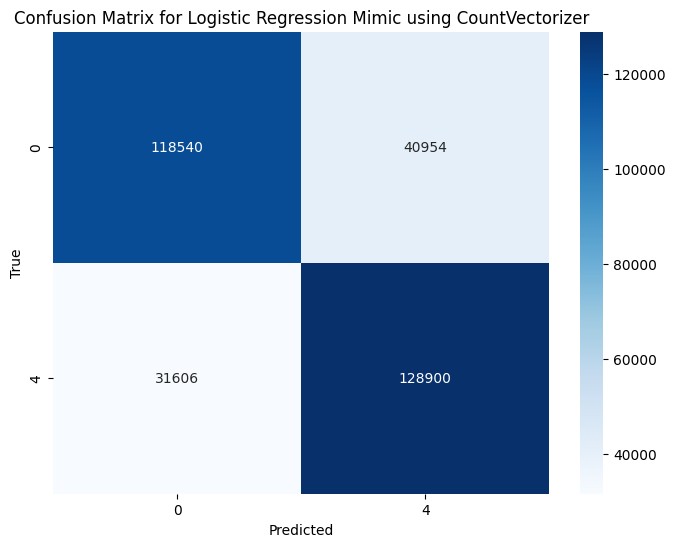

10000/10000 [==============================] - 11s 1ms/step
Classification Report for Logistic Regression Mimic with TFIDFVectorizer:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77    159494
           4       0.77      0.79      0.78    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



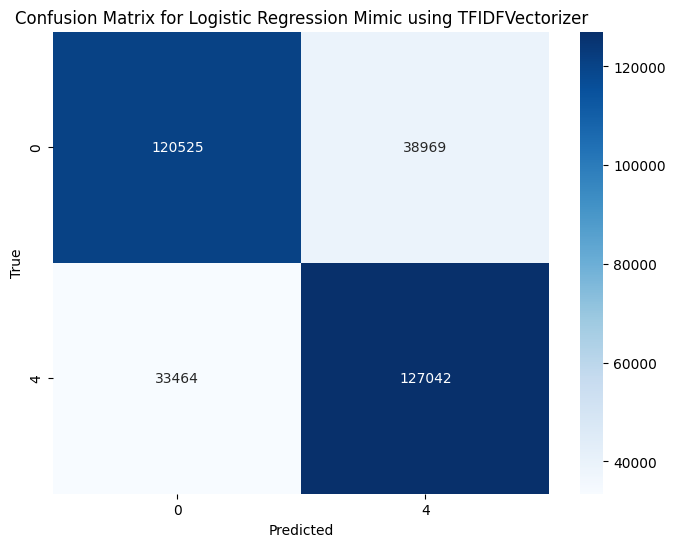

10000/10000 [==============================] - 51s 5ms/step
Classification Report for SVC Mimic with CountVectorizer:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78    159494
           4       0.78      0.79      0.79    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



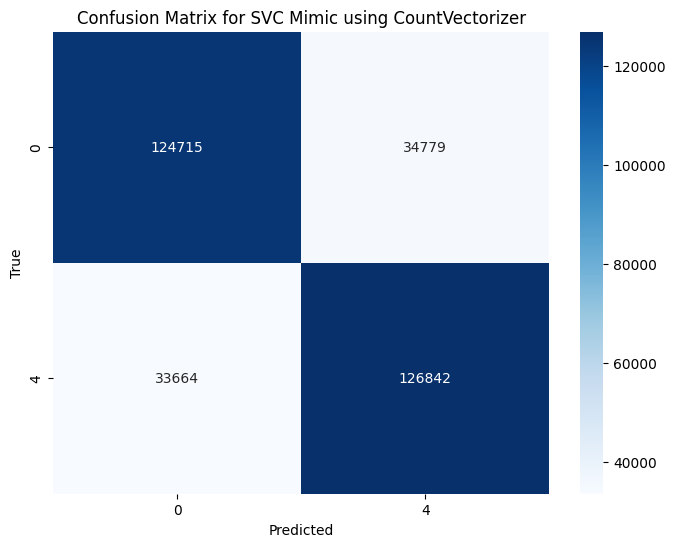

10000/10000 [==============================] - 51s 5ms/step
Classification Report for SVC Mimic with TFIDFVectorizer:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78    159494
           4       0.78      0.79      0.79    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



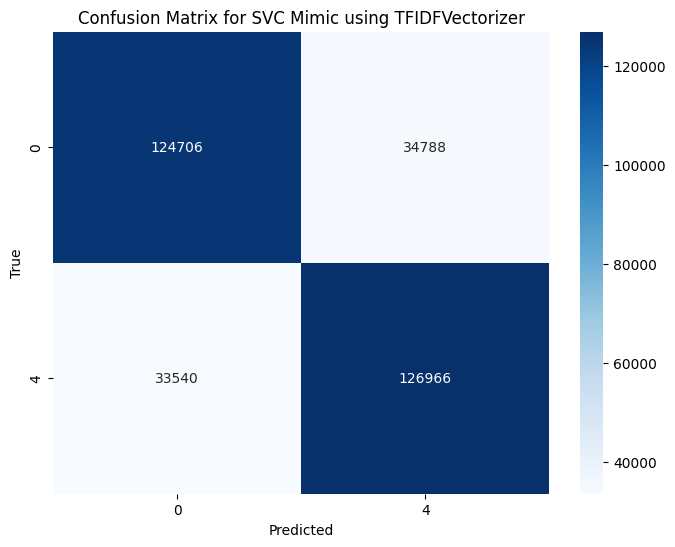

10000/10000 [==============================] - 74s 7ms/step
Classification Report for Random Forest Mimic with CountVectorizer:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78    159494
           4       0.79      0.79      0.79    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



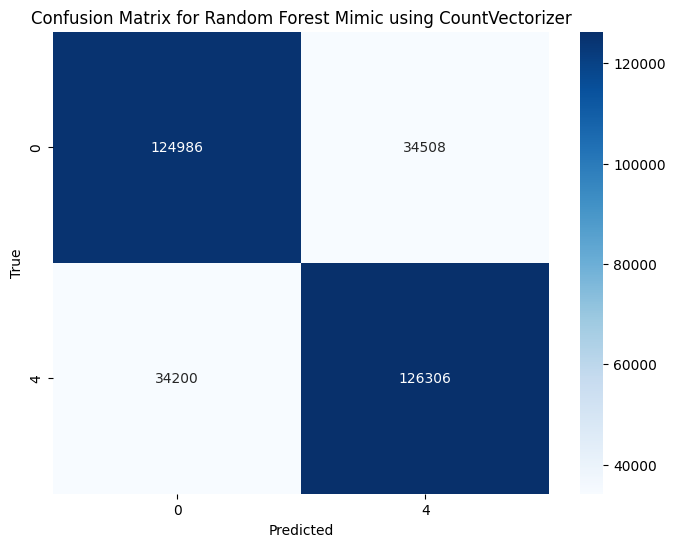

10000/10000 [==============================] - 67s 7ms/step
Classification Report for Random Forest Mimic with TFIDFVectorizer:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78    159494
           4       0.78      0.80      0.79    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



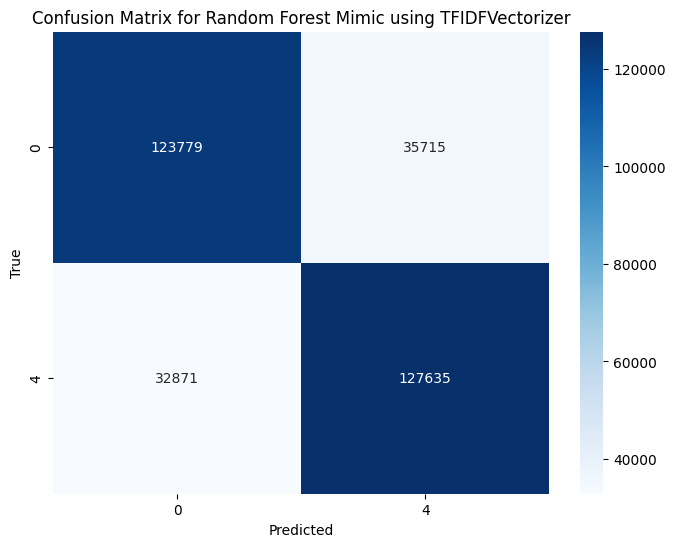

In [ ]:
# Generate reports for Logistic Regression Mimic Model
generate_classification_report_and_heatmap(logistic_regression_mimic_count, X_test_count.toarray(), y_test, 'CountVectorizer', 'Logistic Regression Mimic')
generate_classification_report_and_heatmap(logistic_regression_mimic_tfidf, X_test_tfidf.toarray(), y_test, 'TFIDFVectorizer', 'Logistic Regression Mimic')

# Generate reports for SVC Mimic Model
generate_classification_report_and_heatmap(svc_mimic_count, X_test_count.toarray(), y_test, 'CountVectorizer', 'SVC Mimic')
generate_classification_report_and_heatmap(svc_mimic_tfidf, X_test_tfidf.toarray(), y_test, 'TFIDFVectorizer', 'SVC Mimic')

# Generate reports for Random Forest Mimic Model
generate_classification_report_and_heatmap(random_forest_mimic_count, X_test_count.toarray(), y_test, 'CountVectorizer', 'Random Forest Mimic')
generate_classification_report_and_heatmap(random_forest_mimic_tfidf, X_test_tfidf.toarray(), y_test, 'TFIDFVectorizer', 'Random Forest Mimic')



### Key Observations:
1. **Accuracy and F1-Score**:
   - All models achieve similar accuracy and F1-scores, generally around 77-79%, indicating consistent performance across the different vectorization methods and classifiers.
   - Logistic Regression and SVC both perform slightly better with TFIDFVectorizer, showing marginal improvements in recall for class '4'.
   - Random Forest achieves the highest precision and recall using CountVectorizer, but the improvement is minimal compared to TFIDFVectorizer.

2. **Confusion Matrix Insights**:
   - **Logistic Regression with CountVectorizer** shows more misclassifications between classes '0' and '4' compared to TFIDFVectorizer.
   - **SVC with TFIDFVectorizer** has the best balance in classification with slightly fewer misclassifications in both classes.
   - **Random Forest with CountVectorizer** shows a higher count of true positive predictions for class '0' and slightly fewer false positives for class '4'.

3. **Classifier Performance**:
   - **Logistic Regression**: Consistent but slightly less effective than SVC and Random Forest in managing false positives and negatives.
   - **SVC**: Provides a strong balance between precision and recall, especially with TFIDFVectorizer.
   - **Random Forest**: Shows robust performance in identifying true negatives and positives but is marginally less effective with TFIDFVectorizer in minimizing false positives for class '4'.

### Conclusion:
- **Best Model**: SVC with TFIDFVectorizer seems to offer the most balanced performance across all metrics, making it a reliable choice for general classification tasks.
- **Vectorizer Choice**: TFIDFVectorizer slightly outperforms CountVectorizer across all models, especially in handling misclassifications between classes.
- **Overall Recommendation**: For balanced performance with fewer misclassifications, SVC with TFIDFVectorizer is recommended. However, if interpretability and simpler models are preferred, Logistic Regression with TFIDFVectorizer also offers competitive performance.



In [1]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3
  libcommons-logging-java libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern pandoc-data poppler-data
  preview-latex-style rake ruby ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base texlive-binaries
  texlive-fonts-recommended texlive-latex-base texlive-latex-recommended texlive-pictures
  texlive-plain-generic tipa xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-fre

In [2]:
!pip install pypandoc

In [4]:
from google.colab import drive
drive.flush_and_unmount()  # This will unmount the drive


Drive not mounted, so nothing to flush and unmount.


In [5]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
!jupyter nbconvert --to pdf "/content/drive/My Drive/Colab Notebooks/Parth_Tripathi_071_A3.ipynb" --output "Parth_Tripathi_071_A3_NLP"



[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/Parth_Tripathi_071_A3.ipynb to pdf
[NbConvertApp] Support files will be in Parth_Tripathi_071_A3_NLP_1_files/
[NbConvertApp] Making directory ./Parth_Tripathi_071_A3_NLP_1_files
[NbConvertApp] Writing 141430 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 271822 bytes to /content/drive/My Drive/Colab Notebooks/Parth_Tripathi_071_A3_NLP_1.pdf
